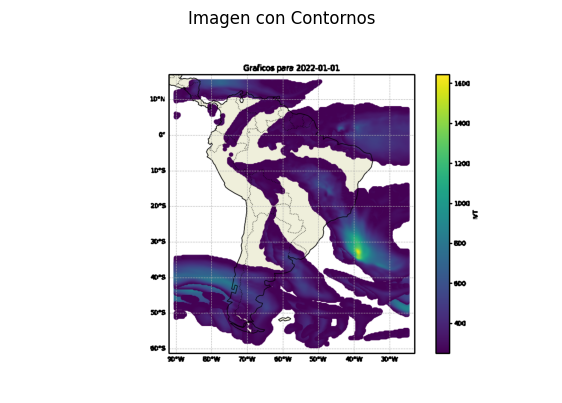

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def detectar_objetos_colores(image_path):
    # Obtener la ruta completa al archivo
    full_path = os.path.join("/home/sebastian/Documentos/analisisNETCDF/DatosGRFICADOS/", image_path)

    # Verificar si la imagen existe en la ruta especificada
    if not os.path.isfile(full_path):
        print(f"No se pudo encontrar la imagen en la ruta: {full_path}")
        return

    # Cargar la imagen
    img = cv2.imread(full_path)

    # Verificar si la imagen se cargó correctamente
    if img is None:
        print(f"No se pudo cargar la imagen desde la ruta: {full_path}")
        return

    # Convertir la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Definir los rangos de colores para azul, morado y oscuro
    lower_blue = np.array([100, 0, 0], dtype=np.uint8)
    upper_blue = np.array([140, 255, 255], dtype=np.uint8)

    lower_purple = np.array([120, 0, 120], dtype=np.uint8)
    upper_purple = np.array([160, 255, 160], dtype=np.uint8)

    lower_dark = np.array([0, 0, 0], dtype=np.uint8)
    upper_dark = np.array([50, 50, 50], dtype=np.uint8)

    # Crear máscaras para cada rango de color
    mask_blue = cv2.inRange(img, lower_blue, upper_blue)
    mask_purple = cv2.inRange(img, lower_purple, upper_purple)
    mask_dark = cv2.inRange(img, lower_dark, upper_dark)

    # Combinar las máscaras
    combined_mask = mask_blue | mask_purple | mask_dark

    # Encontrar contornos en la imagen combinada
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calcular el centro de masa de cada contorno
    centers = [cv2.moments(cnt)["m10"] / cv2.moments(cnt)["m00"] if cv2.moments(cnt)["m00"] != 0 else 0 for cnt in contours]

    # Ordenar los contornos por su distancia al centro
    sorted_contours = [contours[i] for i in np.argsort(centers)]

    # Dibujar contornos en la imagen original con contorno negro
    img_contours = img_rgb.copy()
    cv2.drawContours(img_contours, sorted_contours, -1, (0, 0, 0), 2)

    # Mostrar la imagen original con contornos
    plt.figure(figsize=(7, 7))
    plt.imshow(img_contours)
    plt.title("Imagen con Contornos")
    plt.axis("off")
    plt.show()

# Nombre del archivo
file_name = "grafico_2022-01-01.png"

# Llamada a la función para detectar objetos de colores específicos y dibujar contornos
detectar_objetos_colores(file_name)
